---
#### Titulo:
*   Regressão linear múltipla  
#### Matéria:
*   1SISA - Cálculo Computacional e Estatística 2025/2
#### Nome:
*   Jhoel Diego Mamani Mita
---

---

## Exercício 1


In [1]:
#Adicionando os dados
numero_quartos = c(3, 2, 4, 2, 3, 2, 5, 4)
numero_banheiros = c(2, 1, 3, 1, 2, 2, 3, 2)
preco = c(143800.00 , 109300.00, 158800.00, 109200.00, 154700.00, 114900.00, 188400.00, 142900.00)
df_preco_casas = data.frame(numero_quartos, numero_banheiros, preco)
df_preco_casas

numero_quartos,numero_banheiros,preco
<dbl>,<dbl>,<dbl>
3,2,143800
2,1,109300
4,3,158800
2,1,109200
3,2,154700
2,2,114900
5,3,188400
4,2,142900


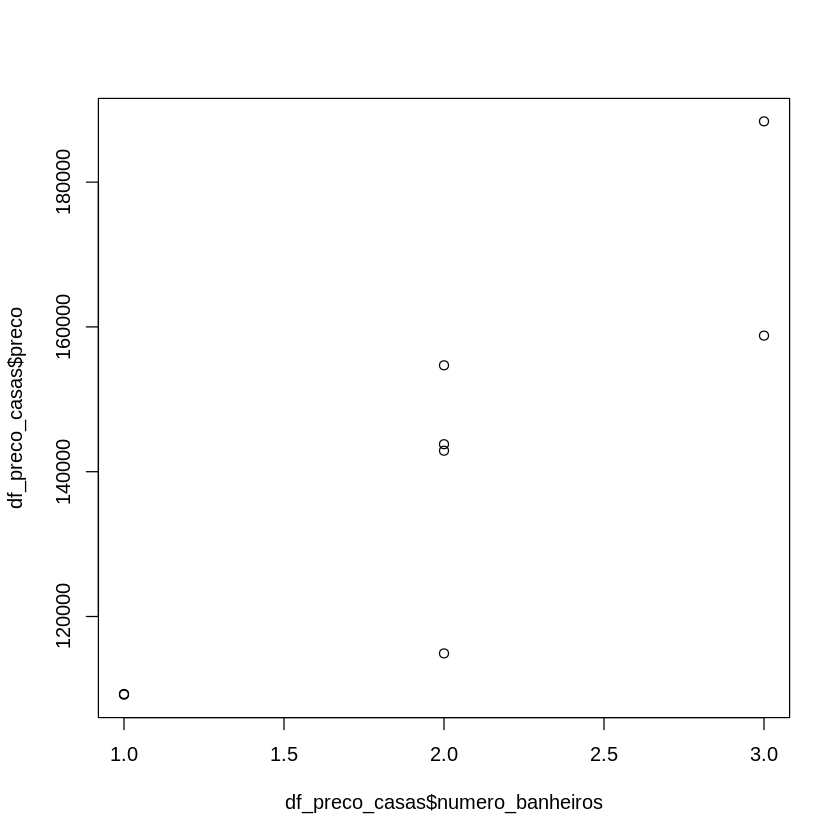

In [5]:
plot(df_preco_casas$numero_banheiros, df_preco_casas$preco)

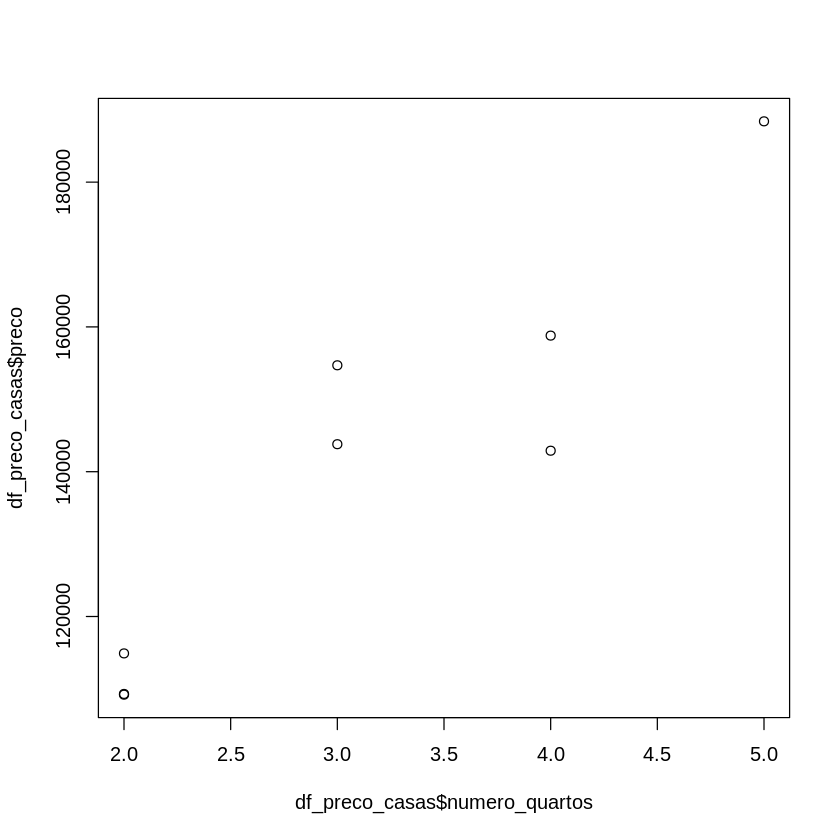

In [6]:
plot(df_preco_casas$numero_quartos, df_preco_casas$preco)

1. Encontre uma equação linear que permita prever o preço de venda médio de uma
casa no bairro dado, em termos de número de quartos e do número de banheiros.
Escreva qual é a equação.

In [2]:
summary(df_preco_casas)

 numero_quartos  numero_banheiros     preco       
 Min.   :2.000   Min.   :1.00     Min.   :109200  
 1st Qu.:2.000   1st Qu.:1.75     1st Qu.:113500  
 Median :3.000   Median :2.00     Median :143350  
 Mean   :3.125   Mean   :2.00     Mean   :140250  
 3rd Qu.:4.000   3rd Qu.:2.25     3rd Qu.:155725  
 Max.   :5.000   Max.   :3.00     Max.   :188400  

In [3]:
cor(df_preco_casas$numero_quartos, df_preco_casas$numero_banheiros)

[1] 0.8391814

In [26]:
modelo_preco <- lm(preco ~ numero_quartos + numero_banheiros, data = df_preco_casas)
modelo_preco


Call:
lm(formula = preco ~ numero_quartos + numero_banheiros, data = df_preco_casas)

Coefficients:
     (Intercept)    numero_quartos  numero_banheiros  
           65430             16752             11235  


In [27]:
coeficientes_preco <- coef(modelo_preco)
coeficientes_preco

(Intercept)   numero_quartos numero_banheiros 
        65429.76         16752.38         11234.52

A equeção da regressão linear multipla é:

y = a1.x1 + a2.x2 + b

preco = 16752.38 * x1 + 11234.52 * x2 + 65429.76

Apresente o sumário do modelo e mostre quais os valores de múltiplo R quadrado,
o R quadrado, o RSE e a taxa de erro do modelo.

In [28]:
summary(modelo_preco)


Call:
lm(formula = preco ~ numero_quartos + numero_banheiros, data = df_preco_casas)

Residuals:
     1      2      3      4      5      6      7      8 
  5644   -869  -7343   -969  16544  -6504   5505 -12008 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)         65430      12134   5.392  0.00296 **
numero_quartos      16752       6636   2.524  0.05288 . 
numero_banheiros    11234       9885   1.137  0.30724   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10750 on 5 degrees of freedom
Multiple R-squared:  0.8941,	Adjusted R-squared:  0.8517 
F-statistic:  21.1 on 2 and 5 DF,  p-value: 0.003653


In [38]:
0.8941 * 0.8941

[1] 0.7994148

In [39]:
sigma(modelo_preco)/mean(df_preco_casas$preco)

[1] 0.07665939

Resposta:

| Modelo          | Múltiplo R² | R²         | RSE   | Faixa Erro |
|-----------------|-------------|------------|-------|------------|
| Linear Múltipla | 0.8941      | 0.79941481 | 10750 | 7,66%      |

3. Caso eu queira uma casa com 3 quartos e 1 banheiro, quanto seria o preço
estimado?  

In [35]:
fazer_previsao <- function(q, b){
  nova_casa <- data.frame(numero_quartos = q, numero_banheiros = b)

  previsao_final <- predict(modelo_preco, nova_casa)
  return(previsao_final)
}

In [31]:
fazer_previsao_manual <- function(quartos, banheiros){
  preco <- 16752.38 * quartos + 11234.52 * banheiros + 65429.76
  return(preco)
}

In [36]:
valor_predict <- fazer_previsao(3, 1)
valor_predict

1 
126921.4

In [32]:
valor_equacao <- fazer_previsao_manual(3,1)
valor_equacao

[1] 126921.4

Resposta: O preço estimado sera de R$ 126.921,43



O valor com o uso de predict e modelo é mais preciso já que utiliza os dados inteiros do modelo

---

---
Exercicio 2

In [40]:
dureza = c(78.9, 55.2, 80.9, 57.4, 85.3, 60.7)

conteudo_cobre = c(0.02, 0.02, 0.10, 0.10, 0.18, 0.18)

temperatura_tempera = c(1000, 1200, 1000, 1200, 1000, 1200)

df_dureza_aco = data.frame(conteudo_cobre, temperatura_tempera, dureza)

df_dureza_aco

conteudo_cobre,temperatura_tempera,dureza
<dbl>,<dbl>,<dbl>
0.02,1000,78.9
0.02,1200,55.2
0.10,1000,80.9
0.10,1200,57.4
0.18,1000,85.3
0.18,1200,60.7


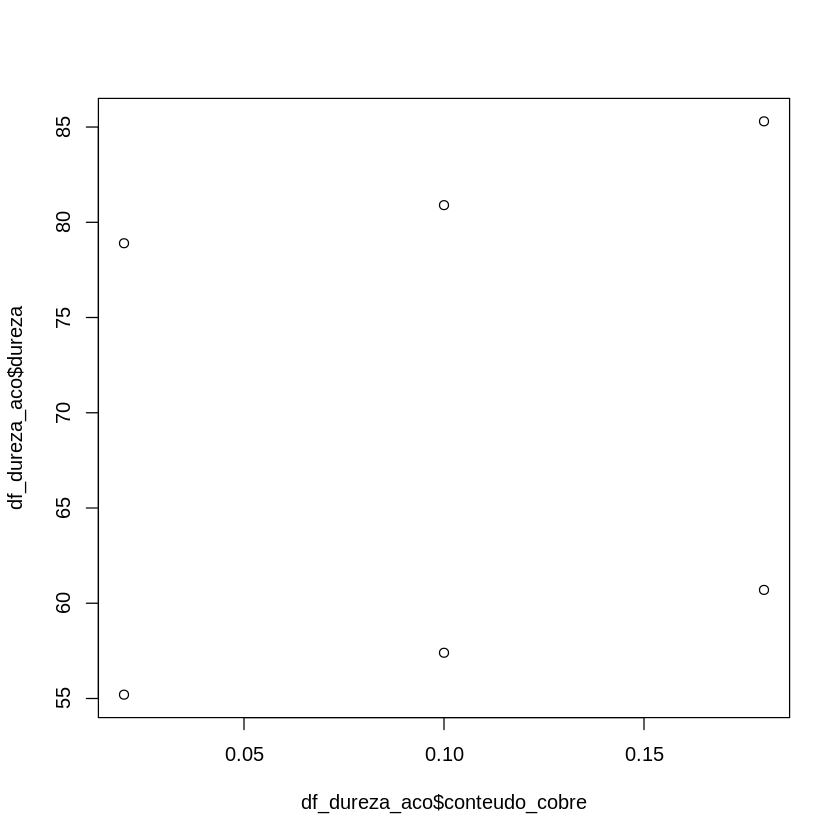

In [43]:
plot(df_dureza_aco$conteudo_cobre, df_dureza_aco$dureza)

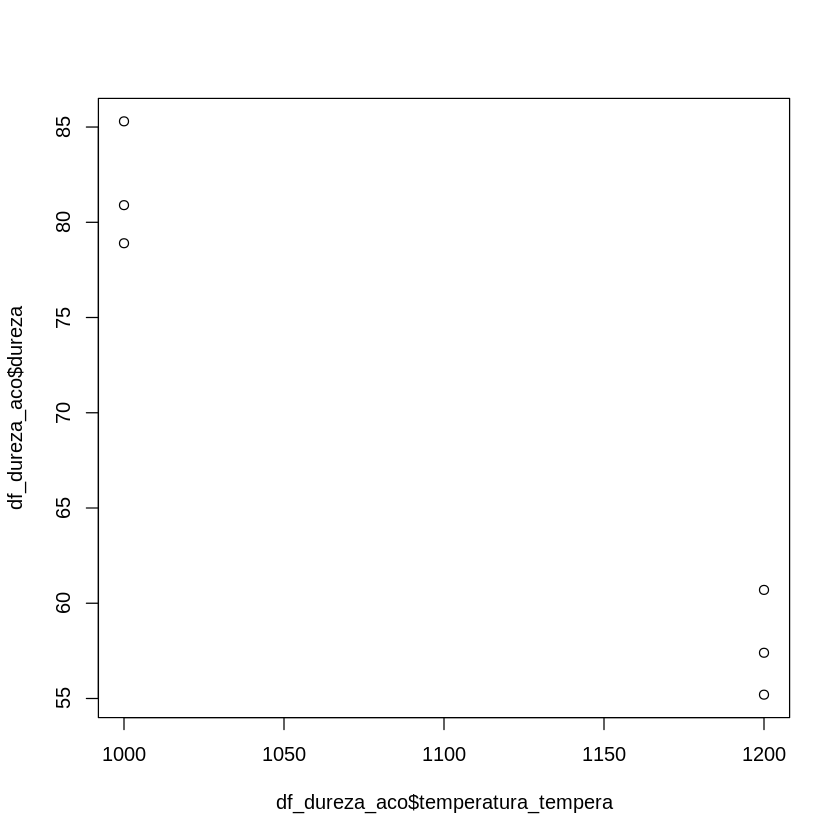

In [44]:
plot(df_dureza_aco$temperatura_tempera, df_dureza_aco$dureza)

1. Determine uma equação da reta para os dados fornecidos.

In [41]:
summary(df_dureza_aco)

 conteudo_cobre temperatura_tempera     dureza     
 Min.   :0.02   Min.   :1000        Min.   :55.20  
 1st Qu.:0.04   1st Qu.:1000        1st Qu.:58.23  
 Median :0.10   Median :1100        Median :69.80  
 Mean   :0.10   Mean   :1100        Mean   :69.73  
 3rd Qu.:0.16   3rd Qu.:1200        3rd Qu.:80.40  
 Max.   :0.18   Max.   :1200        Max.   :85.30  

In [57]:
modelo_dureza <- lm(dureza ~ conteudo_cobre + temperatura_tempera, data = df_dureza_aco)
modelo_dureza


Call:
lm(formula = dureza ~ conteudo_cobre + temperatura_tempera, data = df_dureza_aco)

Coefficients:
        (Intercept)       conteudo_cobre  temperatura_tempera  
           197.6479              37.1875              -0.1197  


In [59]:
coeficientes_dureza <- coef(modelo_dureza)
coeficientes_dureza

(Intercept)      conteudo_cobre temperatura_tempera 
        197.6479167          37.1875000          -0.1196667

A equeção da regressão linear multipla é:

y = a1.x1 + a2.x2 + b

dureza = -0.12 * x1 + 37.19 * x2 + 197.65

2. Apresente o sumário do modelo e mostre quais os valores de múltiplo R quadrado,
o R quadrado, o RSE e a taxa de erro do modelo.

In [60]:
summary(modelo_dureza)


Call:
lm(formula = dureza ~ conteudo_cobre + temperatura_tempera, data = df_dureza_aco)

Residuals:
       1        2        3        4        5        6 
 0.17500  0.40833 -0.80000 -0.36667  0.62500 -0.04167 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         197.647917   3.069795  64.385 8.26e-06 ***
conteudo_cobre       37.187500   4.214568   8.824  0.00307 ** 
temperatura_tempera  -0.119667   0.002753 -43.469 2.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6743 on 3 degrees of freedom
Multiple R-squared:  0.9985,	Adjusted R-squared:  0.9975 
F-statistic: 983.7 on 2 and 3 DF,  p-value: 5.941e-05


In [48]:
0.9985 * 0.9985

[1] 0.9970023

In [61]:
sigma(modelo_dureza) / mean(df_dureza_aco$dureza)

[1] 0.009670138

Resposta:

|      Modelo     | Múltiplo R² | R²         | RSE    | Faixa Erro |
|:---------------:|-------------|------------|--------|------------|
| Linear Múltipla | 0.9985      | 0.99700225 | 0.6743 | 0.97%      |

3. Utilize a equação da reta para estimar a dureza do aço quando o conteúdo de
cobre é de 0,14% e a temperatura de têmpera for de 1100° F  

In [62]:
fazer_previsao_dureza <- function(q, b){
  nova_dureza <- data.frame(conteudo_cobre = q, temperatura_tempera = b)

  previsao_final <- predict(modelo_dureza, nova_dureza)
  return(previsao_final)
}

In [64]:
valor_predict_dureza <- fazer_previsao_dureza(0.14, 1100)
valor_predict_dureza

1 
71.22083

Resposta: A dureza estimada é de 71.22t

---





---


## Exercicio 3

In [65]:
medicamento_A = c(15, 15, 15, 15, 30, 30, 30, 30, 45, 45, 45, 45)
medicamento_B = c(20, 20, 30, 30, 20, 20, 30, 30, 20, 20, 30, 30)
medicamento_C = c(10, 20, 10, 20, 10, 20, 10, 20, 10, 20, 10, 20)

eficacia_percentual = c(47, 54, 58, 66, 59, 67, 71, 83, 72, 82, 85, 94)

df_analgesico = data.frame(eficacia_percentual, medicamento_A, medicamento_B, medicamento_C)

df_analgesico

eficacia_percentual,medicamento_A,medicamento_B,medicamento_C
<dbl>,<dbl>,<dbl>,<dbl>
47,15,20,10
54,15,20,20
58,15,30,10
66,15,30,20
59,30,20,10
67,30,20,20
71,30,30,10
83,30,30,20
72,45,20,10


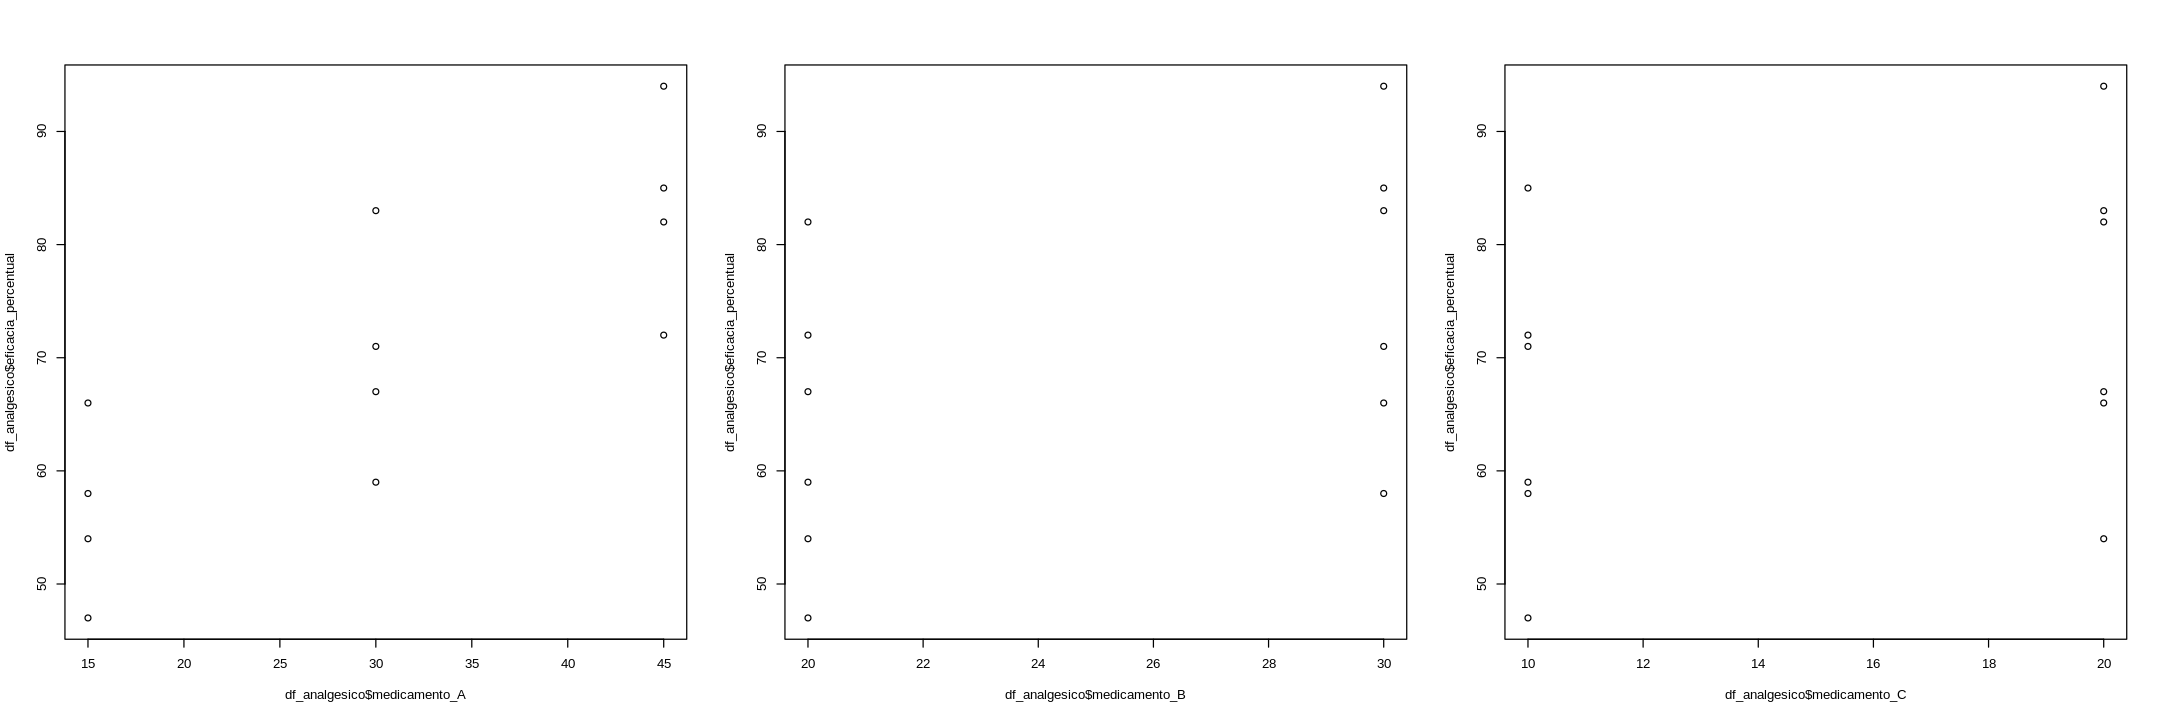

In [70]:
options(repr.plot.width = 18, repr.plot.height = 6)

par(mfrow = c(1, 3))
plot(df_analgesico$medicamento_A, df_analgesico$eficacia_percentual )
plot(df_analgesico$medicamento_B, df_analgesico$eficacia_percentual )
plot(df_analgesico$medicamento_C, df_analgesico$eficacia_percentual )

1. Determine a equação de regressão.

In [71]:
summary(df_analgesico)

 eficacia_percentual medicamento_A medicamento_B medicamento_C
 Min.   :47.00       Min.   :15    Min.   :20    Min.   :10   
 1st Qu.:58.75       1st Qu.:15    1st Qu.:20    1st Qu.:10   
 Median :69.00       Median :30    Median :25    Median :15   
 Mean   :69.83       Mean   :30    Mean   :25    Mean   :15   
 3rd Qu.:82.25       3rd Qu.:45    3rd Qu.:30    3rd Qu.:20   
 Max.   :94.00       Max.   :45    Max.   :30    Max.   :20   

In [72]:
modelo_analgesico <- lm(eficacia_percentual ~ medicamento_A + medicamento_B + medicamento_C, data = df_analgesico)
modelo_analgesico


Call:
lm(formula = eficacia_percentual ~ medicamento_A + medicamento_B + 
    medicamento_C, data = df_analgesico)

Coefficients:
  (Intercept)  medicamento_A  medicamento_B  medicamento_C  
       -2.333          0.900          1.267          0.900  


In [74]:
coeficientes_analgesico <- coef(modelo_analgesico)
coeficientes_analgesico

(Intercept) medicamento_A medicamento_B medicamento_C 
    -2.333333      0.900000      1.266667      0.900000

A equeção da regressão linear multipla é:

y = a1.x1 + a2.x2 + a3.x3 b

eficacia_percentual = 0.9 * x1 + 1.27 * x2 + 0.9 * x3 + -2.33

2. Apresente o sumário do modelo, mostre os valores de Múltiplo R quadrado, R
quadrado, RSE e a taxa de erro do modelo.  

In [75]:
summary(modelo_analgesico)


Call:
lm(formula = eficacia_percentual ~ medicamento_A + medicamento_B + 
    medicamento_C, data = df_analgesico)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1667 -0.5417 -0.1667  0.1250  2.3333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.33333    2.20006  -1.061     0.32    
medicamento_A  0.90000    0.02805  32.081 9.71e-10 ***
medicamento_B  1.26667    0.06872  18.433 7.73e-08 ***
medicamento_C  0.90000    0.06872  13.097 1.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.19 on 8 degrees of freedom
Multiple R-squared:  0.9948,	Adjusted R-squared:  0.9929 
F-statistic: 513.5 on 3 and 8 DF,  p-value: 1.75e-09


In [76]:
0.9948 * 0.9948

[1] 0.989627

In [77]:
sigma(modelo_analgesico)/ mean(df_analgesico$eficacia_percentual)

[1] 0.01704398

Resposta:
|      Modelo     | Múltiplo R² | R²         | RSE  | Faixa Erro |
|:---------------:|-------------|------------|------|------------|
| Linear Múltipla | 0.9948      | 0.98962704 | 1.19 | 1.70%      |

3. Utilize a equação para estimar a eficácia percentual média de cápsulas contendo
12,5 mg do medicamento A, 25 mg do medicamento B e 15 mg do medicamento C  

In [78]:
fazer_previsao_eficacia <- function(a, b, c){
  novo_remedio <- data.frame(medicamento_A = a, medicamento_B = b, medicamento_C = c )

  previsao_final <- predict(modelo_analgesico, novo_remedio)
  return(previsao_final)
}

In [79]:
valor_eficacia <- fazer_previsao_eficacia(12.5, 25, 15)
valor_eficacia

1 
54.08333

Resposta: A eficacia aproximada é de 54.08%



---

